In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('PH-Sales.csv')

In [ ]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [ ]:
df.tail()

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
len(df)

144

In [ ]:
#creating the date columns by using date range 
df['Date']=pd.date_range(start='2003-01-01',periods=len(df),freq='MS')#month start date if 'm' is there it gives you end date of month

In [ ]:
df.tail()

,Month-Year,Number of Tractor Sold,Date
139,Aug-14,848,2014-08-01
140,Sep-14,640,2014-09-01
141,Oct-14,581,2014-10-01
142,Nov-14,519,2014-11-01
143,Dec-14,605,2014-12-01


In [ ]:
df['year']=pd.to_datetime(df['Date']).dt.year #creating the year features for the eda
df['Month']=pd.to_datetime(df['Date']).dt.month #creating the month column for the eda

In [ ]:
df.head(2)

,Month-Year,Number of Tractor Sold,Date,year,Month
0,Jan-03,141,2003-01-01,2003,1
1,Feb-03,157,2003-02-01,2003,2


In [ ]:
import calendar


In [ ]:
calendar.month_abbr[12]# USED TO convert the month name

'Dec'

In [ ]:
df['Month_name']=df['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df.tail()

,Month-Year,Number of Tractor Sold,Date,year,Month,Month_name
139,Aug-14,848,2014-08-01,2014,8,Aug
140,Sep-14,640,2014-09-01,2014,9,Sep
141,Oct-14,581,2014-10-01,2014,10,Oct
142,Nov-14,519,2014-11-01,2014,11,Nov
143,Dec-14,605,2014-12-01,2014,12,Dec


In [ ]:
df.rename(columns={'Number of Tractor Sold':'Sales'},inplace=True)

In [ ]:
df.head(12)

,Month-Year,Sales,Date,year,Month,Month_name
0,Jan-03,141,2003-01-01,2003,1,Jan
1,Feb-03,157,2003-02-01,2003,2,Feb
2,Mar-03,185,2003-03-01,2003,3,Mar
3,Apr-03,199,2003-04-01,2003,4,Apr
4,May-03,203,2003-05-01,2003,5,May
5,Jun-03,189,2003-06-01,2003,6,Jun
6,Jul-03,207,2003-07-01,2003,7,Jul
7,Aug-03,207,2003-08-01,2003,8,Aug
8,Sep-03,171,2003-09-01,2003,9,Sep
9,Oct-03,150,2003-10-01,2003,10,Oct


In [ ]:
df.set_index(['Date'],inplace=True)

In [ ]:
tsa_df=df['Sales']

<AxesSubplot: xlabel='Date', ylabel='Sales'>

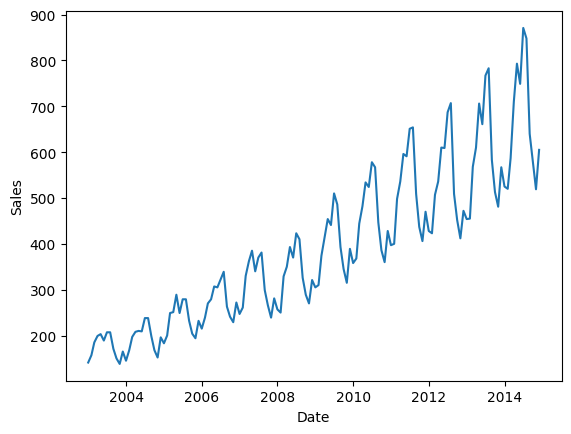

In [ ]:
sns.lineplot(tsa_df)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose=seasonal_decompose(tsa_df)

In [ ]:
decompose.seasonal

Date
2003-01-01   -68.763889
2003-02-01   -66.434343
2003-03-01    -1.638889
2003-04-01    29.952020
2003-05-01    75.876263
                ...    
2014-08-01    90.482323
2014-09-01   -14.233586
2014-10-01   -61.328283
2014-11-01   -88.680556
2014-12-01   -38.763889
Name: seasonal, Length: 144, dtype: float64

In [ ]:
decompose.trend

Date
2003-01-01   NaN
2003-02-01   NaN
2003-03-01   NaN
2003-04-01   NaN
2003-05-01   NaN
              ..
2014-08-01   NaN
2014-09-01   NaN
2014-10-01   NaN
2014-11-01   NaN
2014-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [ ]:
decompose.resid

Date
2003-01-01   NaN
2003-02-01   NaN
2003-03-01   NaN
2003-04-01   NaN
2003-05-01   NaN
              ..
2014-08-01   NaN
2014-09-01   NaN
2014-10-01   NaN
2014-11-01   NaN
2014-12-01   NaN
Name: resid, Length: 144, dtype: float64

### In decompose we have two kind of approach 
### 1.- Additive model => y= trends+seasonality + errors/residual
### 2. Multiplicative model => y =trend x  seasonality x residual 

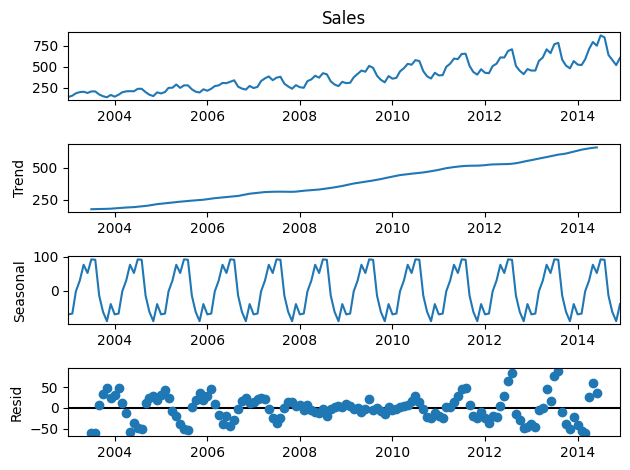

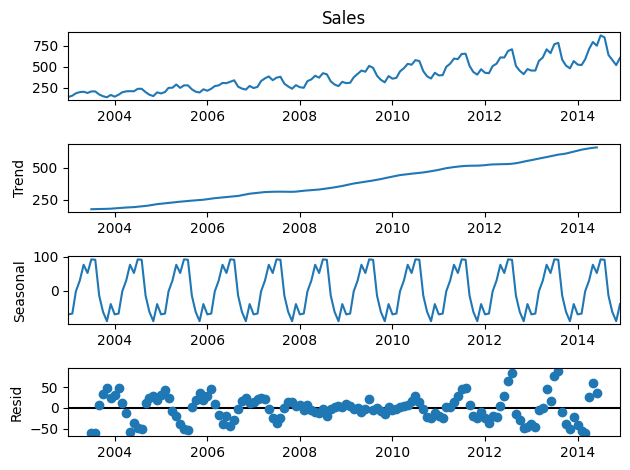

In [ ]:
decompose.plot()

<AxesSubplot: xlabel='Date'>

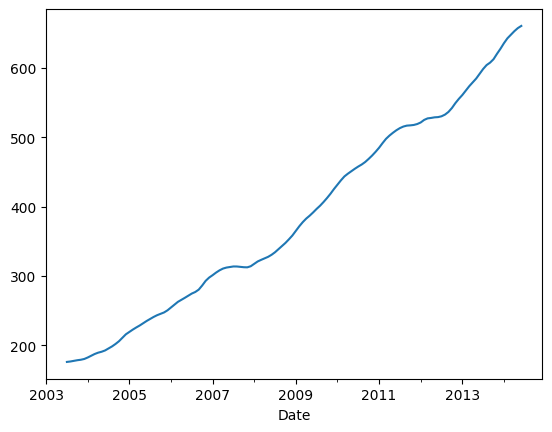

In [ ]:
decompose.trend.plot()

<AxesSubplot: xlabel='Date'>

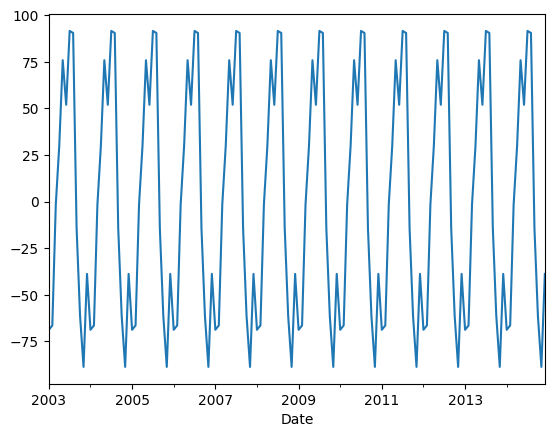

In [ ]:
decompose.seasonal.plot()

###  Simple moving average 

In [ ]:
tsa_df.head()

Date
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Name: Sales, dtype: int64

In [ ]:
#Roling statistics 
tsa_df.rolling(window=4).mean()# taking the 4 previous to calculat the mean 

Date
2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01    170.50
2003-05-01    186.00
               ...  
2014-08-01    815.25
2014-09-01    777.00
2014-10-01    735.00
2014-11-01    647.00
2014-12-01    586.25
Name: Sales, Length: 144, dtype: float64

In [ ]:
tsa_df.rolling(window=6).mean()

Date
2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
                 ...    
2014-08-01    759.666667
2014-09-01    768.500000
2014-10-01    747.000000
2014-11-01    701.333333
2014-12-01    677.333333
Name: Sales, Length: 144, dtype: float64

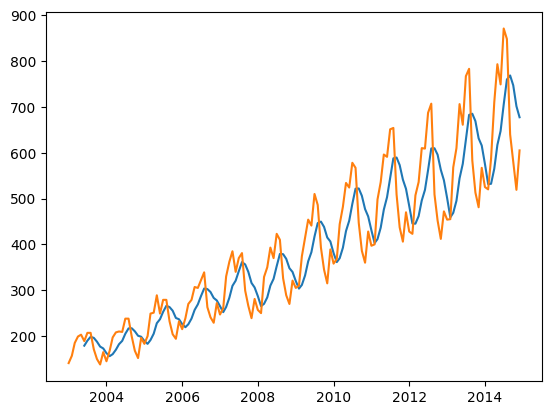

In [ ]:
plt.plot(tsa_df.rolling(window=6).mean())
plt.plot(tsa_df)

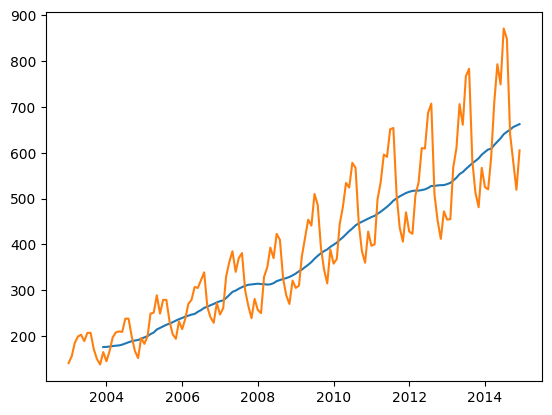

In [ ]:
plt.plot(tsa_df.rolling(window=12).mean())
plt.plot(tsa_df)

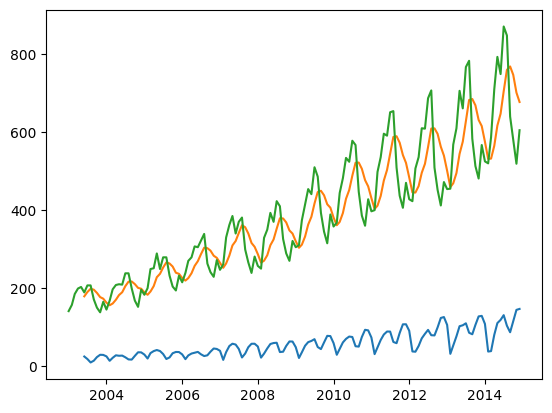

In [ ]:
plt.plot(tsa_df.rolling(window=6).std())
plt.plot(tsa_df.rolling(window=6).mean())
plt.plot(tsa_df)

In [ ]:
df.head()

,Month-Year,Sales,year,Month,Month_name
Date,,,,,
2003-01-01,Jan-03,141,2003,1,Jan
2003-02-01,Feb-03,157,2003,2,Feb
2003-03-01,Mar-03,185,2003,3,Mar
2003-04-01,Apr-03,199,2003,4,Apr
2003-05-01,May-03,203,2003,5,May


In [ ]:
pivot_data_month_index=pd.pivot(df,values='Sales',index='Month_name',columns='year')

In [ ]:
pivot_data_month_index

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month_name,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [ ]:
df['Month_name'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
pivot_data_month_index=pivot_data_month_index.reindex(index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'])

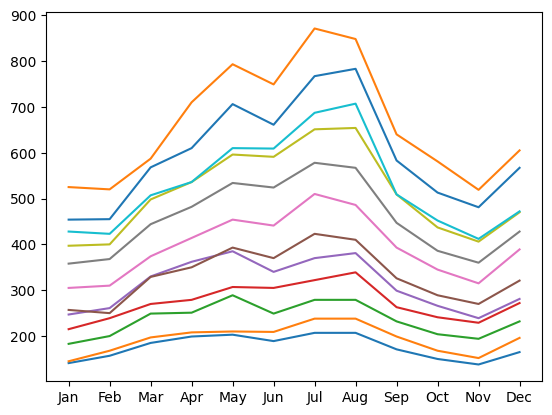

In [ ]:
plt.plot(pivot_data_month_index)

<AxesSubplot: >

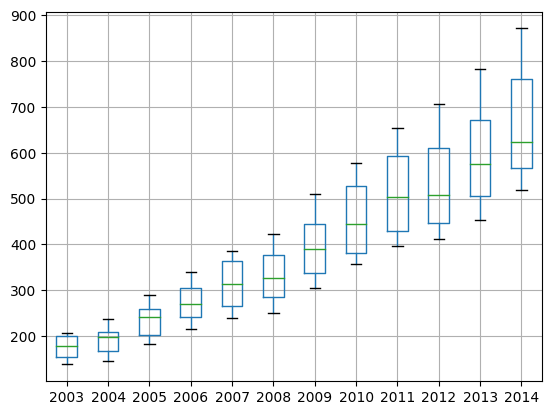

In [ ]:
pivot_data_month_index.boxplot()

In [ ]:
pd.pivot(df,values='Sales',index='year',columns='Month_name')

Month_name,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


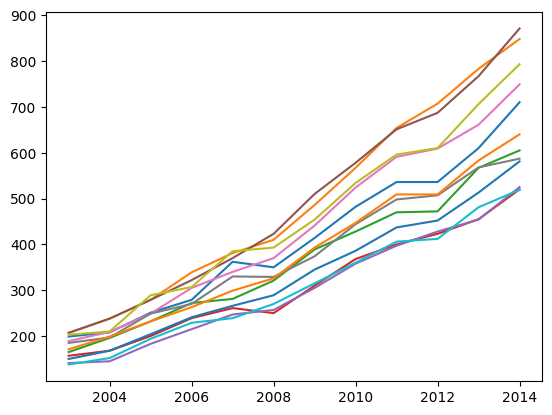

In [ ]:
plt.plot(pd.pivot(df,values='Sales',index='year',columns='Month_name'))

<AxesSubplot: >

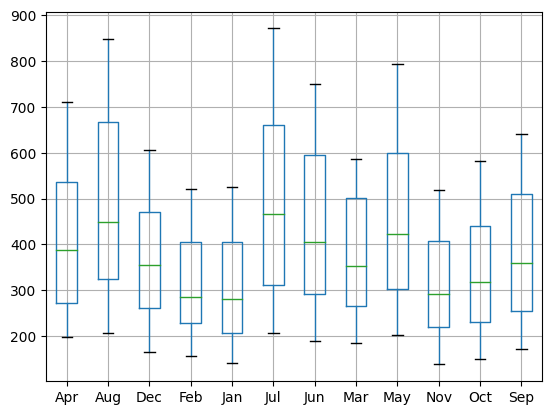

In [ ]:
pd.pivot(df,values='Sales',index='year',columns='Month_name').boxplot()

<AxesSubplot: xlabel='Sales', ylabel='Density'>

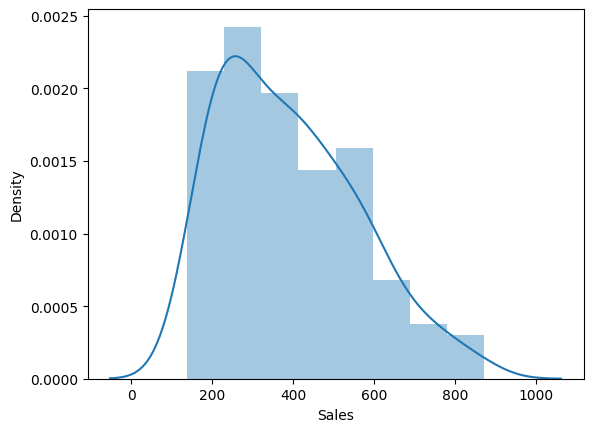

In [ ]:
sns.distplot(tsa_df)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test=adfuller(tsa_df,autolag='AIC')
test

(1.1088250591467343,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

### 1 - statistics value
### 2- P-value
### 3- lags used
### 3- No of observation
### confidence interval

In [ ]:
adfuller={'Statistics Values':test[0],'p-value':test[1],'#lags used':test[2],'No. of observations':test[3]}
for key,value in test[4].items():
    adfuller[f'Confidence intervals {key}']=value
adfuller

{'Statistics Values': 1.1088250591467343,
 'p-value': 0.9952912415248419,
 '#lags used': 14,
 'No. of observations': 129,
 'Confidence intervals 1%': -3.482087964046026,
 'Confidence intervals 5%': -2.8842185101614626,
 'Confidence intervals 10%': -2.578864381347275}

In [ ]:
def stats_test(tsa_sales):
    plt.figure(figsize=(10,7))
    plt.plot(tsa_sales.rolling(12).mean(),label='Mean ')
    plt.plot(tsa_sales.rolling(12).std(),label='Std')
    plt.plot(tsa_sales)
    plt.legend()
    plt.title('Plot to check stationary or not')
    from statsmodels.tsa.stattools import adfuller
    test=adfuller(tsa_sales,autolag='AIC')
    stats={'Statistics Values':test[0],'p-value':test[1],'#lags used':test[2],'No. of observations':test[3]}
    for key,value in test[4].items():
        stats[f'Confidence intervals {key}']=value
    print('----------------'*5)
    print(pd.Series(stats))
    print('----------------'*5)
    if stats['p-value']<0.05:
        print(f"We reject the null Hypothesis {stats['p-value']}")
    else:
        print(f"We accept the null Hypothesis {stats['p-value']}")

### H(O)- Null Hypothesis - Time series is not stationary 
### H(A)- Alternate Hypothesis  - time series is Stationary

--------------------------------------------------------------------------------
Statistics Values             1.108825
p-value                       0.995291
#lags used                   14.000000
No. of observations         129.000000
Confidence intervals 1%      -3.482088
Confidence intervals 5%      -2.884219
Confidence intervals 10%     -2.578864
dtype: float64
--------------------------------------------------------------------------------
We accept the null Hypothesis 0.9952912415248419


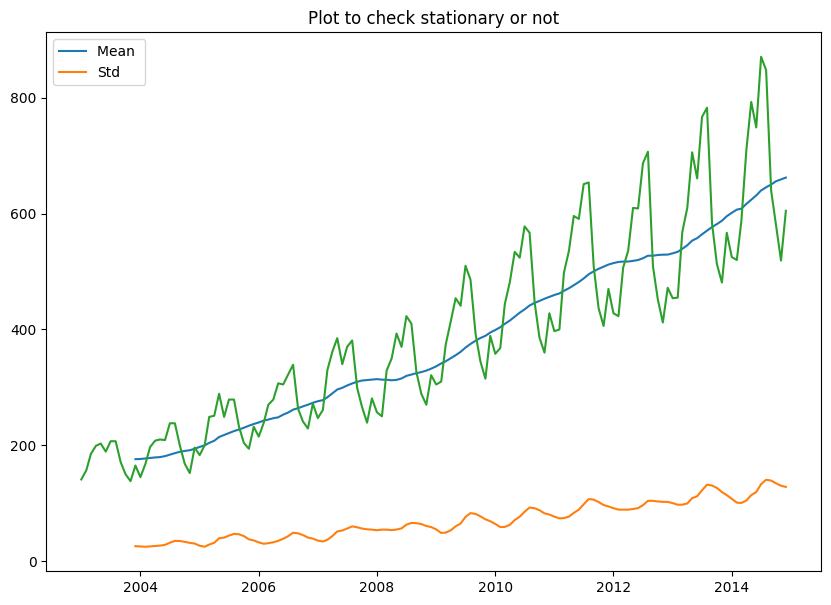

In [ ]:
stats_test(tsa_df)

### Condition for the stationary data 
1- Mean should be constant 
2. standard deviation should be constant


In [ ]:
tsa_df

Date
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Sales, Length: 144, dtype: int64

--------------------------------------------------------------------------------
Statistics Values            -2.543481
p-value                       0.105250
#lags used                   14.000000
No. of observations         128.000000
Confidence intervals 1%      -3.482501
Confidence intervals 5%      -2.884398
Confidence intervals 10%     -2.578960
dtype: float64
--------------------------------------------------------------------------------
We accept the null Hypothesis 0.10525012618273494


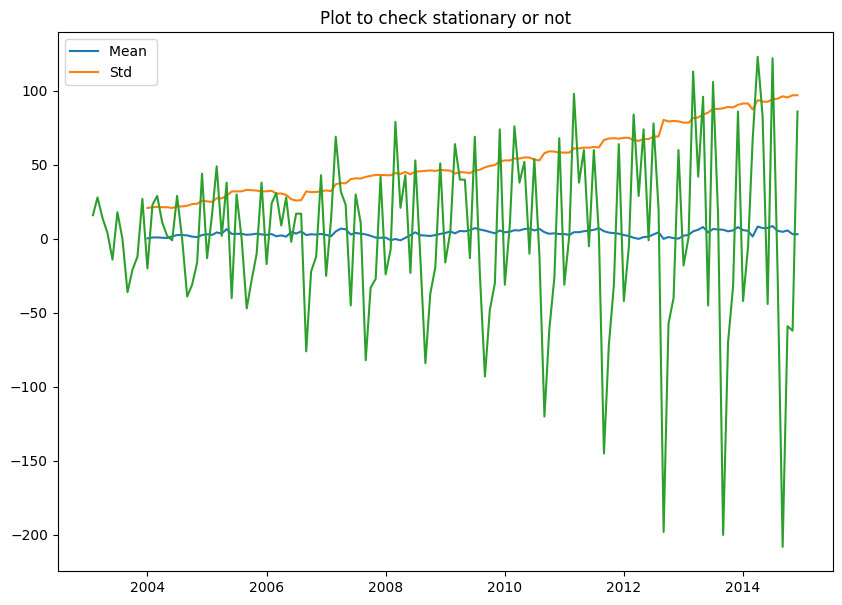

In [ ]:
#convert the time seriesinto stationary by differencing 
one_diff_data=tsa_df.diff(periods=1)
one_diff_data=one_diff_data.dropna()
stats_test(one_diff_data)

In [ ]:
import numpy as np
log_diff_data=np.log(tsa_df).diff(periods=1).dropna()

In [ ]:
log_diff_data2=np.log(tsa_df).diff(periods=2).dropna()

--------------------------------------------------------------------------------
Statistics Values            -2.680467
p-value                       0.077480
#lags used                   14.000000
No. of observations         128.000000
Confidence intervals 1%      -3.482501
Confidence intervals 5%      -2.884398
Confidence intervals 10%     -2.578960
dtype: float64
--------------------------------------------------------------------------------
We accept the null Hypothesis 0.07747972836508674


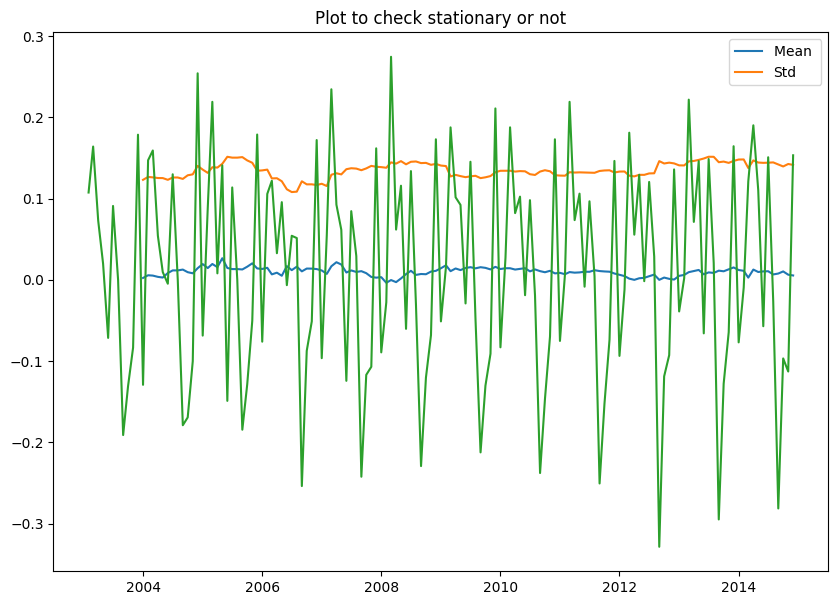

In [ ]:
stats_test(log_diff_data)

--------------------------------------------------------------------------------
Statistics Values            -3.200722
p-value                       0.019943
#lags used                   11.000000
No. of observations         130.000000
Confidence intervals 1%      -3.481682
Confidence intervals 5%      -2.884042
Confidence intervals 10%     -2.578770
dtype: float64
--------------------------------------------------------------------------------
We reject the null Hypothesis 0.01994295010546223


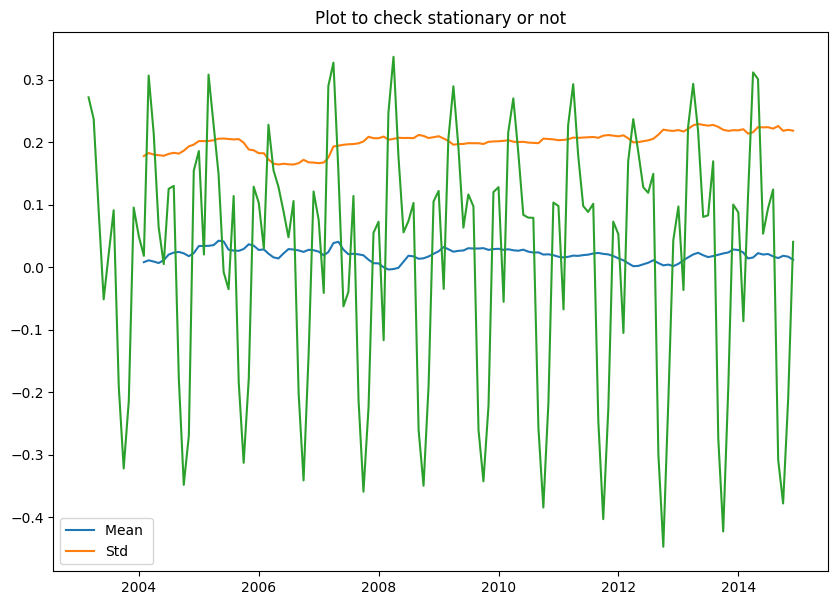

In [ ]:
stats_test(log_diff_data2)

### Now the data is tranformed into stationary data by performing the log tranformation and difference 

### Arima and Sarima
### PACF
### ACF
### BIC
### AIC

In [ ]:
import statsmodels.api  as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

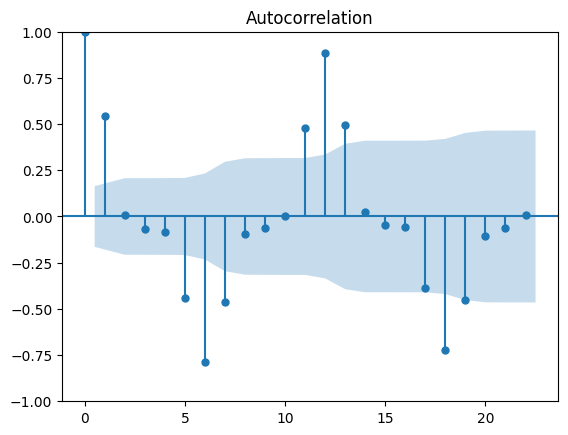

In [ ]:
smt.graphics.plot_acf(log_diff_data2);

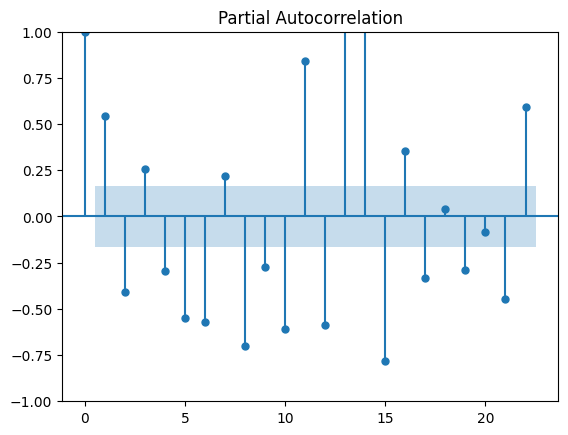

In [ ]:
smt.graphics.plot_pacf(log_diff_data2);

p= Autoregressive 
d= differencing 
q= moving average

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data,order=(p,d,q))
model.fit()
model.forecast()

In [ ]:
#mse
#np.sqrt(mse(y,prediction))

In [ ]:
def arima_model(x,y,arima_order):
    #data we have to pass into the form of list 
    data=[i for i in x]
    prediction=list()
    for i in range(len(y)):
        model=ARIMA(data,order=(p,d,q))
        model_fit=model.fit()
        y_pred=model_fit.forecast()[0]
        prediction.append(y_pred)
        data.append(y[i])

In [ ]:
len(tsa_df)

144

In [ ]:
data=[i for i in tsa_df[:120]]
print(f'Original dta {data}')
test=data=[i for i in tsa_df[120:]]
print(f'Orginal test data {test}')
for i in range(len(test)):
    data.append(test[i])
data

Original dta [141, 157, 185, 199, 203, 189, 207, 207, 171, 150, 138, 165, 145, 168, 197, 208, 210, 209, 238, 238, 199, 168, 152, 196, 183, 200, 249, 251, 289, 249, 279, 279, 232, 204, 194, 232, 215, 239, 270, 279, 307, 305, 322, 339, 263, 241, 229, 272, 247, 261, 330, 362, 385, 340, 370, 381, 299, 266, 239, 281, 257, 250, 329, 350, 393, 370, 423, 410, 326, 289, 270, 321, 305, 310, 374, 414, 454, 441, 510, 486, 393, 345, 315, 389, 358, 368, 444, 482, 534, 524, 578, 567, 447, 386, 360, 428, 397, 400, 498, 536, 596, 591, 651, 654, 509, 437, 406, 470, 428, 423, 507, 536, 610, 609, 687, 707, 509, 452, 412, 472]
Orginal test data [454, 455, 568, 610, 706, 661, 767, 783, 583, 513, 481, 567, 525, 520, 587, 710, 793, 749, 871, 848, 640, 581, 519, 605]


[454,
 455,
 568,
 610,
 706,
 661,
 767,
 783,
 583,
 513,
 481,
 567,
 525,
 520,
 587,
 710,
 793,
 749,
 871,
 848,
 640,
 581,
 519,
 605,
 454,
 455,
 568,
 610,
 706,
 661,
 767,
 783,
 583,
 513,
 481,
 567,
 525,
 520,
 587,
 710,
 793,
 749,
 871,
 848,
 640,
 581,
 519,
 605]